# Objectives
1. Use string manipulation with Pandas objects
2. Create new columns using elementwise arithmetic
3. Distinguish the main difference between the Seaborn and Pandas wrappers for Matplotlib functionality

We will continue to use the Baby Names file to practice common data manipulation practices using Pandas. In this exercise, we will explore a single question:

<p style="text-align:center"><b>Can we use the last letter of a name to predict the gender of the baby?</b></p>

### Load the Libraries
Run the following code cell to import each of the libraries that we will use in the lab.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q0.** Again, read the contents of the file to a DataFrame named `names`, use the Id column as the index, and inspect the first five rows.

In [2]:
names = pd.read_csv('babynames.csv')
names = names.set_index('Id')
names.head()

,Name,Year,Gender,Count
Id,,,,
1,Mary,1880,F,7065
2,Anna,1880,F,2604
3,Emma,1880,F,2003
4,Elizabeth,1880,F,1939
5,Minnie,1880,F,1746


In order to answer this question, we can break the problem into the following steps:
1. Compute the last letter of each name
2. Group by the last letter and gender while aggregating (sum) the count
3. Plot the total number of baby names ending in each character for each sex

# 1. Working with Strings
Computing the last letter of each name requires string manipulation. With a Python string, this would be done easily by accessing the last element of the string. As noted, Pandas stores non-numeric data as a generic object type. However, the Series object has a `str` attribute so that we can use string methods. Explore the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods) to better understand it and find a good example of its usage.

**Q1.1.** Use the `str` attribute of the Name column to create a new column named `Last`. The values in this column should be the last character of the name.

In [3]:
names['Last'] = names.Name.str[-1]

# 2. Group by Last and Gender While Aggregating Count
**Q2.1.** Use the `groupby` method and an appropriate aggregation function to determine the total number of babies born with a given name ending in each letter. Assign the result to the variable `letters`. The first four values should look like:
```
Last  Gender
E     F              181
      M              256
a     F         59369213
      M          1992064
```

In [4]:
letters = names.groupby(['Last', 'Gender']).Count.sum()
letters

Last  Gender
E     F              181
      M              256
a     F         59369213
      M          1992064
b     F            18521
      M          1482496
c     F            32559
      M          1711954
d     F           761182
      M         16494417
e     F         38029009
      M         14969531
f     F             2739
      M           215357
g     F            38153
      M           610428
h     F          8402298
      M          7125480
i     F          4000661
      M           998964
j     F             3810
      M            36693
k     F            42125
      M          5476904
l     F          5917461
      M         15299643
m     F           443179
      M          5966987
n     F         20540705
      M         39278583
o     F           415815
      M          4491377
p     F             4703
      M           689348
q     F              804
      M            14239
r     F          4082869
      M         10625144
s     F          3750757
      M     

After inspecting the results, what may surprise you?

There are a lot of babies born with a given name that ends in the capital letter E. Does this make sense? Let's investigate it.

**Q2.2.** Output all observations where the name ends in a capital letter E.

In [5]:
names.loc[names.Last == "E"]

,Name,Year,Gender,Count,Last
Id,,,,,
1829409,TRUE,2015,F,38,E
1846845,TRUE,2015,M,57,E
1863166,TRUE,2016,F,31,E
1880153,TRUE,2016,M,44,E
1895925,TRUE,2017,F,33,E
1912168,TRUE,2017,M,60,E
1926459,TRUE,2018,F,79,E
1943852,TRUE,2018,M,95,E


In this case, Pandas is interpreting the name True as a Boolean value rather than a string (thanks a lot Kardashians). We can fix this behavior by specifying the `dtype` parameter when reading the CSV. For this problem, we will just convert all letters to lowercase.

**Q2.3.** Again, use the `str` attribute of the Name column to create a new column named `Last`. The values in this column should be the last character of the name. However, chain the `lower` method to convert all letters to lowercase. *Hint, you need to use the `str` attribute twice.*

In [6]:
names['Last'] = names.Name.str[-1].str.lower()
names.head()

,Name,Year,Gender,Count,Last
Id,,,,,
1,Mary,1880,F,7065,y
2,Anna,1880,F,2604,a
3,Emma,1880,F,2003,a
4,Elizabeth,1880,F,1939,h
5,Minnie,1880,F,1746,e


**Q2.4.** Again, applying the same grouping and aggregation as in **Q2.1.** and assign the result to `letters`. Verify there are no entries with a capital letter E.

In [7]:
letters = names.groupby(['Last', 'Gender']).sum().Count
letters

Last  Gender
a     F         59369213
      M          1992064
b     F            18521
      M          1482496
c     F            32559
      M          1711954
d     F           761182
      M         16494417
e     F         38029190
      M         14969787
f     F             2739
      M           215357
g     F            38153
      M           610428
h     F          8402298
      M          7125480
i     F          4000661
      M           998964
j     F             3810
      M            36693
k     F            42125
      M          5476904
l     F          5917461
      M         15299643
m     F           443179
      M          5966987
n     F         20540705
      M         39278583
o     F           415815
      M          4491377
p     F             4703
      M           689348
q     F              804
      M            14239
r     F          4082869
      M         10625144
s     F          3750757
      M         17597777
t     F          2554945
      M     

# 3. Plot the Results
In the following two code cells, I plot this using Seaborn first and then Pandas second. Remember, `letters` is a Series object with a multi-index. Note the differences and explore the methods that I used to learn more.

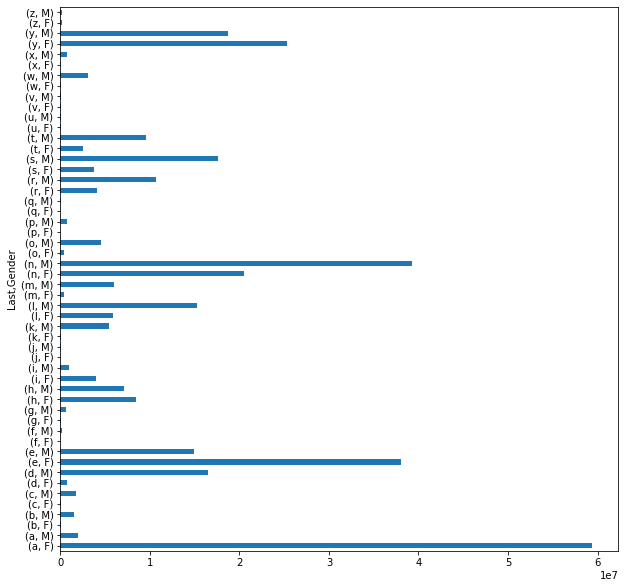

In [8]:
# Pandas wrapper to create a horizontal barplot and change the figure size
letters.plot(kind='barh', figsize=(10, 10))
plt.show()

By default, Pandas will make the column(s) that were grouped as the index. This is not helpful because it is not obvious which bars are for which gender. Instead, we'd like to plot each gender a different color (map gender to the `hue` parameter similar to how we mapped the index to the `y` parameter), so we need the last letter and gender to be their own columns.

**Q3.1.** Use the `reset_index` method to do this. This is a method for both Series and DataFrame objects. By default, it returns a new Series or DataFrame so you must assign the result to a variable. In this case, we no longer need this version of `letters` so we will assign the result to `letters`. *Note, it is good practice to output the result to make sure it is doing what you expect before assigning it to a variable.*

In [9]:
letters = letters.reset_index()
letters

,Last,Gender,Count
0,a,F,59369213
1,a,M,1992064
2,b,F,18521
3,b,M,1482496
4,c,F,32559
5,c,M,1711954
6,d,F,761182
7,d,M,16494417
8,e,F,38029190
9,e,M,14969787


**Q3.2.** Now, we are able to map the color of each bar to the Gender column. In Seaborn, this is done with the `hue` parameter. Create the same barplot as above with the except the y-axis will only have letters and each letter will have two different bars for gender. *Note, I set my figure size to (15, 15)

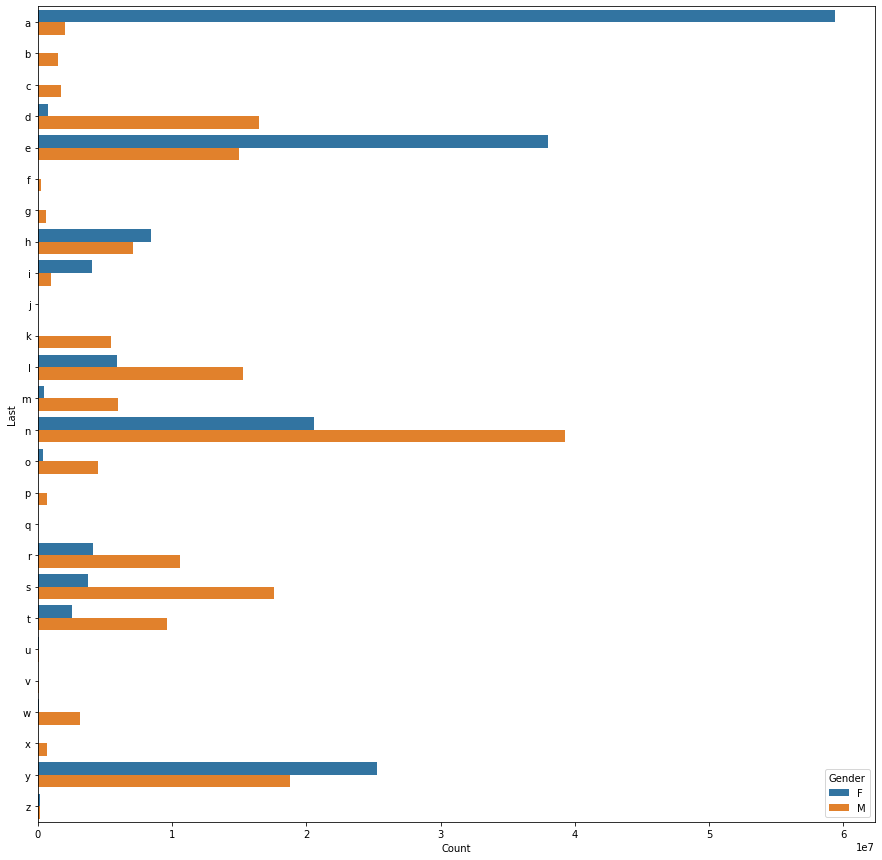

In [10]:
plt.figure(figsize=(15, 15))
sns.barplot(x="Count", y="Last", hue="Gender", data=letters)
plt.show()

This is helpful because we can now see the disparity in the size of the bars. The larger the difference, the easier it is to predict the gender on that letter. However, it is still hard to decipher for some letters because we are displaying the magnitude and some letters are much more frequent than others. As a result, it is hard to distinguish for the very small bars. 

# 4. Normalizing the Data
A better way to communicate this data is to show the proportion of males to females for each letter. We can use the `letters_pivot` DataFrame to calculate the proportion of males with a name ending in a letter by dividing it by the total of males and females with names ending in that letter.
1. Create a Series named `total` by calculating the total babies for each letter
2. Create a new column named `Percent Males` by dividing `M` by `total`
3. Create a new column named `Percent Females` by dividing `F` by `total`

**Q4.1.** Create a Series named `total`. This can be done by applying the `sum` method to the DataFrame. This method requires you to pass an argument for the `axis` parameter which specifies whether to sum over the rows ("columns" and return a Series with the same number of rows) or to sum over the columns ("index" and return a Series with the same number of columns).

In [11]:
total = letters.groupby('Last').sum()
total

,Count
Last,
a,61361277
b,1501017
c,1744513
d,17255599
e,52998977
f,218096
g,648581
h,15527778
i,4999625


**Q4.2.** Next, create the `Percent Males` and `Percent Females` columns in `letters_pivot`.

In [12]:
# reset index to match total
letters = letters.set_index('Last')

# calculate percent males and females
pct_male = letters.loc[letters.Gender == 'M'].Count / total.Count
pct_female = letters.loc[letters.Gender == 'F'].Count / total.Count

# merge both series together and rename columns
letters_pct = df = pd.merge(pct_male, pct_female, right_index = True, left_index = True) 
letters_pct = letters_pct.rename(columns={'Count_x': 'Percent Males', 'Count_y': 'Percent Females'})

# inspect
letters_pct

,Percent Males,Percent Females
Last,,
a,0.032465,0.967535
b,0.987661,0.012339
c,0.981336,0.018664
d,0.955888,0.044112
e,0.282454,0.717546
f,0.987441,0.012559
g,0.941175,0.058825
h,0.458886,0.541114
i,0.199808,0.800192


**Q4.3.** Finally, we can again create the same bar plot. This time, sort the DataFrame so that the disparity between genders is even more clear. You can use either the Pandas or Seaborn wrapper to Matplotlib, but Pandas is easiest in the current shape of our data. What would you need to do in order to use Seaborn like previously?

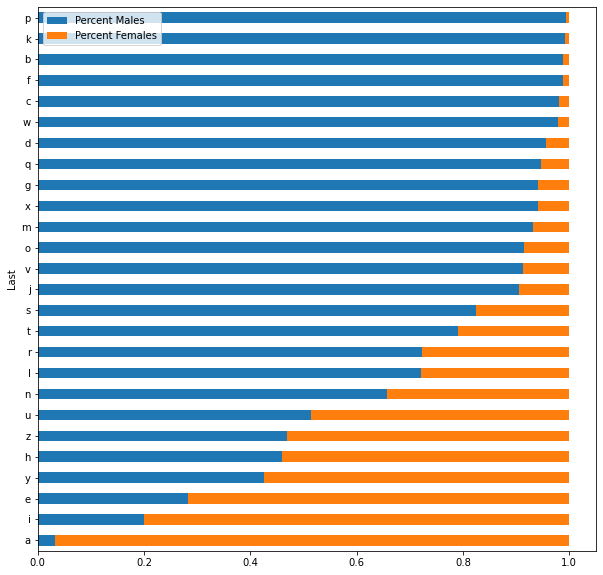

In [13]:
### BEGIN SOLUTION
letters_pct.loc[:,['Percent Males', 'Percent Females']].sort_values('Percent Males').plot(kind='barh',stacked=True, figsize=(10,10))
plt.show()
### END SOLUTION

In the Pandas wrapper for a bar plot, you can specify a Boolean argument for the `stacked` parameter. Instead, of plotting the bars clustered next to one another, it will stack them on top of each other. In this case, that is helpful because you can quickly see which letters transition near 0.5.